In [1]:
import pandas as pd

# Загрузка даних
dataframe = pd.read_csv('icecreamreviews.csv', delimiter=',', encoding='latin1')

# Видалення нульових значень
dataframe = dataframe.dropna()

# Перетворення колонки з датою в об'єкт datetime
dataframe['date'] = pd.to_datetime(dataframe['date'])

# Сортування датасету за зростанням
dataframe = dataframe.sort_values(by='date')

# Вивід даних
dataframe

key           author       date  stars                        title  \
7186  48_bj  Ice cream lover 2017-02-09      5           Best Flavor Ever!!   
2898  17_bj         Edstromp 2017-03-30      4       A favourite for years!   
4087  28_bj    Halfbakedluvr 2017-04-03      5                   Holy shoot   
5500  34_bj   HelloMyLove143 2017-04-06      5                   Fantastic!   
5045  30_bj            Memah 2017-04-07      5                My favorite!!   
...     ...              ...        ...    ...                          ...   
838    6_bj          Cezanne 2020-09-23      5            Swept off my feet   
474    3_bj         Scabicky 2020-09-23      1  Cannoli? I donât think so   
359    2_bj          Snorkie 2020-09-23      1     Good idea bad in reality   
3683  24_bj            Mommy 2020-09-24      5                         WOW!   
2875  17_bj        Michael G 2020-09-24      1               So disapointed   

      helpful_yes  helpful_no  \
7186            8           1   
2898            1           0   
4087            1           0   
5500            0           0   
5045            0           0   
...           ...         ...   
838             0           0   
474             0           0   
359             0           0   
3683            0           0   
2875            0           0   

                                                   text  
7186  This was my favorite years ago and was discont...  
2898  I like many flavours of B&J but I tend to turn...  
4087  So f*cking good plz bless yourself and buy it ...  
5500  Perfect combo of my favorite swirl from Oatmea...  
5045  This is my favorite ice cream ever. Although, ...  
...                                                 ...  
838   When I bought this flavor, I was hesitant to s...  
474   Not only does this ice cream do nothing to rem...  
359   Potato chips are dark tasting, like the crunch...  
3683  My favorite ice cream flavor of all time. It o...  
2875  This used to be heaven in a cup. Now the squis...  

[5204 rows x 8 columns]

In [2]:
import plotly.express as px

fig = px.line(dataframe[:100], x='date', y='stars', title='Часовий ряд',
              labels={'Value': 'stars', 'Date': 'date'})
fig.show()

D:\Software\Anaconda\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [38]:
# Підготовка даних для часового аналізу

data = dataframe[['date', 'stars']][:100]

# Заповнення пропущених значень інтерполяцією
data['stars'].interpolate(method='linear', inplace=True)

data

date  stars
7186 2017-02-09      5
2898 2017-03-30      4
4087 2017-04-03      5
5500 2017-04-06      5
5045 2017-04-07      5
...         ...    ...
6972 2017-05-04      5
4059 2017-05-04      5
69   2017-05-04      3
7023 2017-05-05      5
7767 2017-05-05      5

[100 rows x 2 columns]

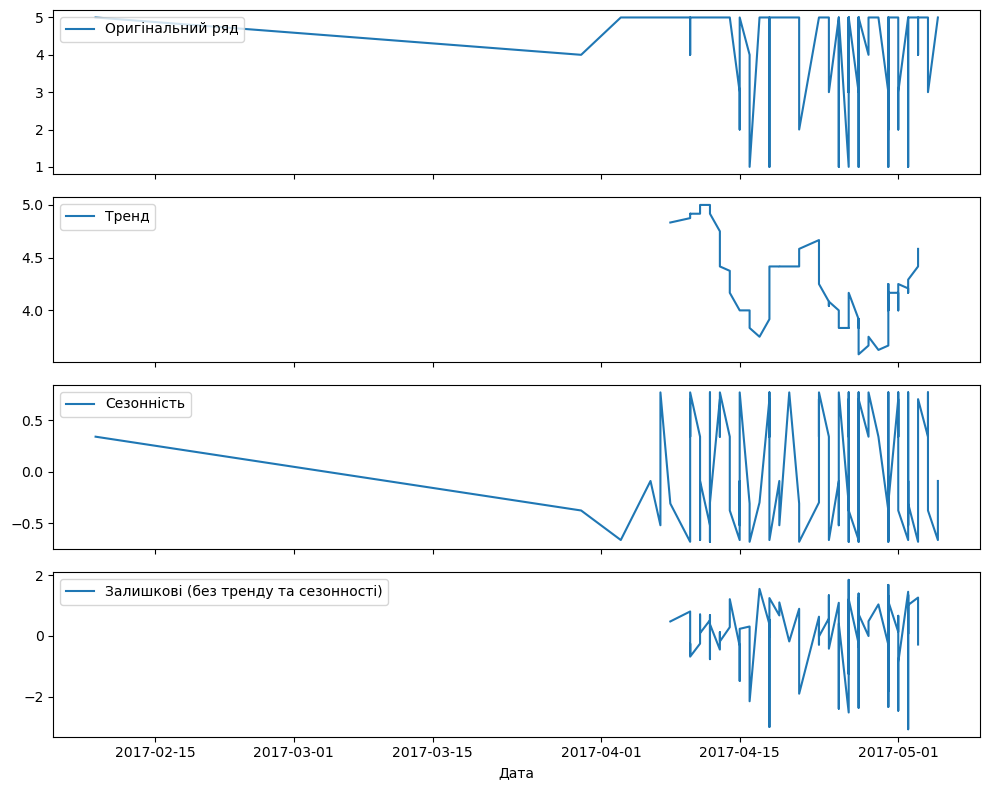

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Призначення часового індексу
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Розбиття на компоненти
result = sm.tsa.seasonal_decompose(data['stars'], model='additive', period=12)

# Візуалізація компонентів (тренд, сезонність, залишкові)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

ax1.plot(data['stars'], label='Оригінальний ряд')
ax1.legend(loc='upper left')

ax2.plot(result.trend, label='Тренд')
ax2.legend(loc='upper left')

ax3.plot(result.seasonal, label='Сезонність')
ax3.legend(loc='upper left')

ax4.plot(result.resid, label='Залишкові (без тренду та сезонності)')
ax4.legend(loc='upper left')

plt.xlabel('Дата')
plt.tight_layout()
plt.show()

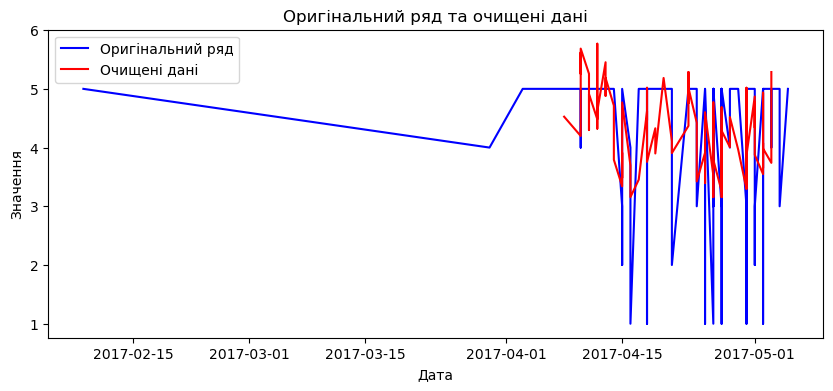

In [40]:
# Використання залишкових компонент для фільтрації
filtered_data = result.trend + result.seasonal

# Візуалізація "очищених" даних
plt.figure(figsize=(10, 4))
plt.plot(data['stars'], label='Оригінальний ряд', color='blue')
plt.plot(filtered_data, label='Очищені дані', color='red')
plt.title('Оригінальний ряд та очищені дані')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()

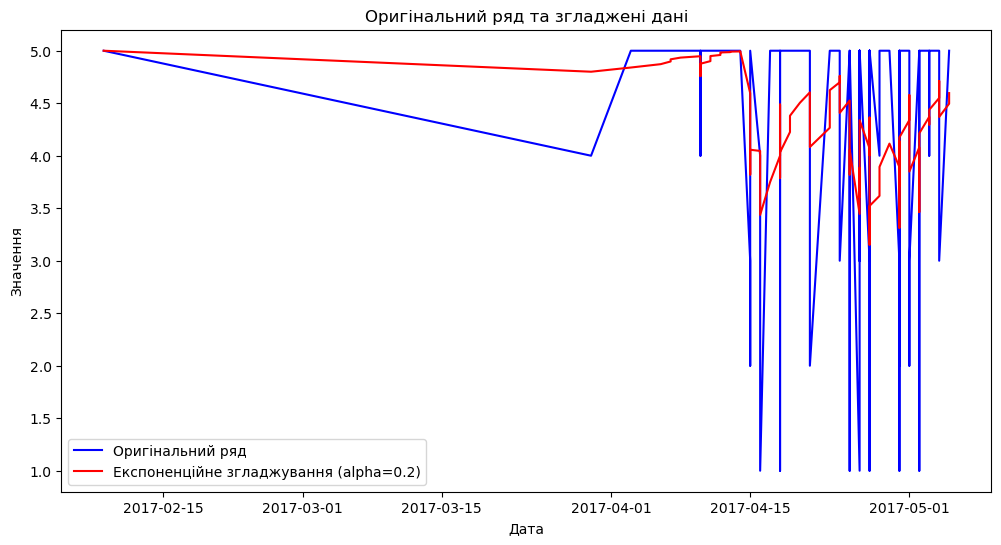

In [42]:
import statsmodels.api as sm

# Експоненційне згладжування
alpha = 0.2  # параметр згладжування
smoothed_data = data['stars'].ewm(alpha=alpha, adjust=False).mean()

# Візуалізація оригінального ряду та згладжених даних
plt.figure(figsize=(12, 6))
plt.plot(data['stars'], label='Оригінальний ряд', color='blue')
plt.plot(smoothed_data, label=f'Експоненційне згладжування (alpha={alpha})', color='red')
plt.title('Оригінальний ряд та згладжені дані')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next 

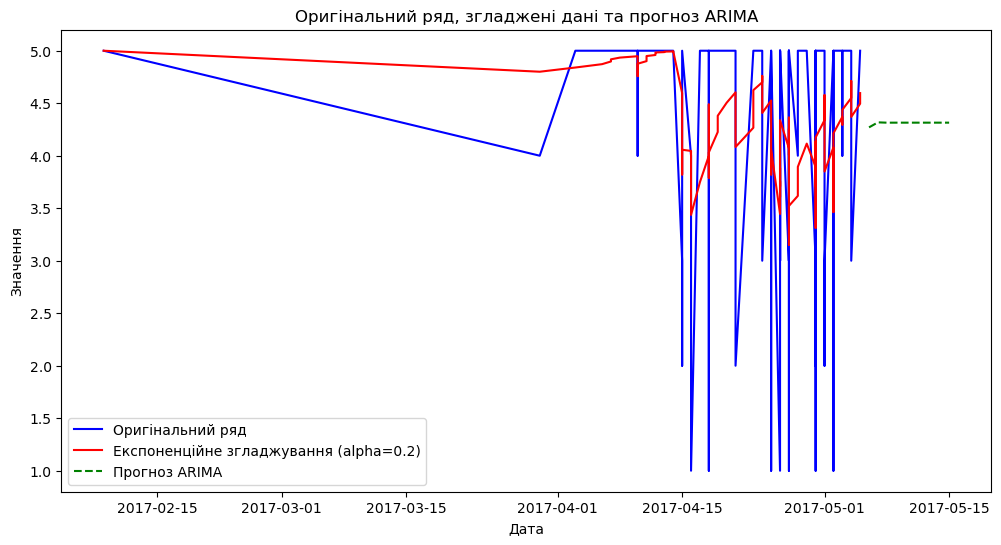

In [50]:
from statsmodels.tsa.arima.model import ARIMA

# Застосування ARIMA для прогнозування
model = ARIMA(data['stars'], order=(1, 1, 1))
result = model.fit()

# Прогноз на n кроків вперед
n_forecast = 10
forecast = result.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(start=data.index[-1], periods=n_forecast+1, freq='D')[1:]

# Візуалізація оригінального ряду, згладжені дані та прогноз
plt.figure(figsize=(12, 6))
plt.plot(data['stars'], label='Оригінальний ряд', color='blue')
plt.plot(smoothed_data, label=f'Експоненційне згладжування (alpha={alpha})', color='red')
plt.plot(forecast_index, forecast.predicted_mean, label='Прогноз ARIMA', color='green', linestyle='dashed')
plt.title('Оригінальний ряд, згладжені дані та прогноз ARIMA')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()

In [ ]:
# лабараторна 19

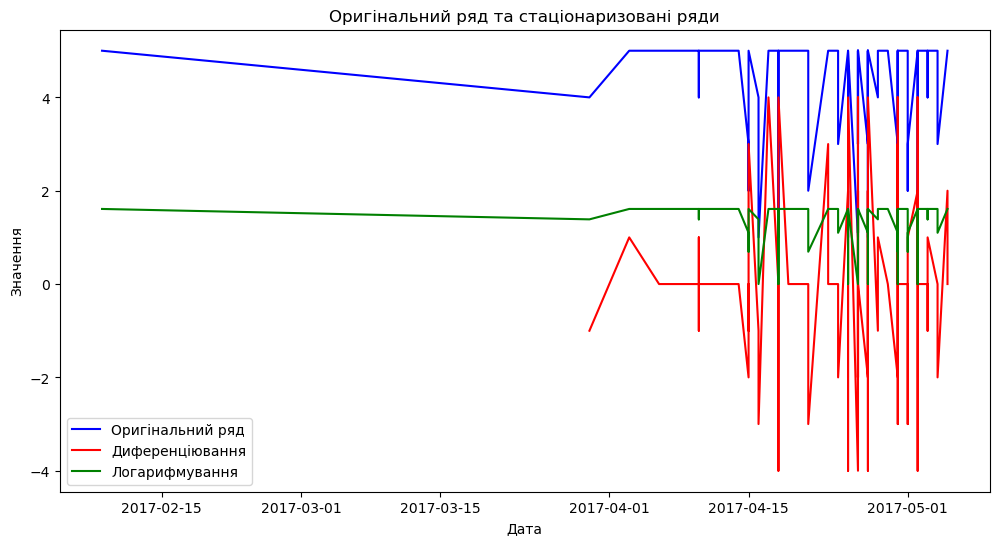

In [52]:
import numpy as np

# Просте диференціювання
data_diff = data.diff().dropna()

# Логарифмування
data_log = np.log(data)

# Візуалізація оригінального ряду та стаціонаризованих рядів
plt.figure(figsize=(12, 6))
plt.plot(data['stars'], label='Оригінальний ряд', color='blue')
plt.plot(data_diff['stars'], label='Диференціювання', color='red')
plt.plot(data_log['stars'], label='Логарифмування', color='green')
plt.title('Оригінальний ряд та стаціонаризовані ряди')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()

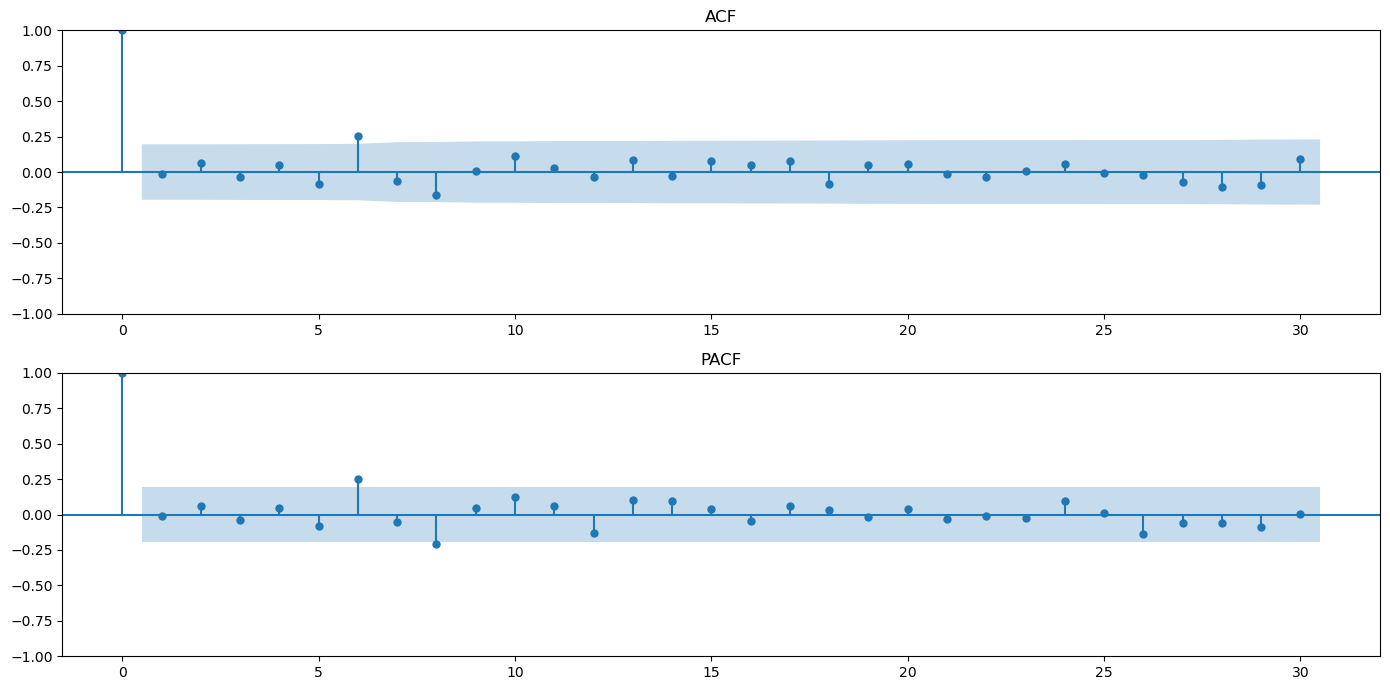

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Побудова графіків ACF та PACF
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plot_acf(data_log['stars'], lags=30, ax=plt.gca(), title='ACF')

plt.subplot(2, 1, 2)
plot_pacf(data_log['stars'], lags=30, ax=plt.gca(), title='PACF')

plt.tight_layout()
plt.show()

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



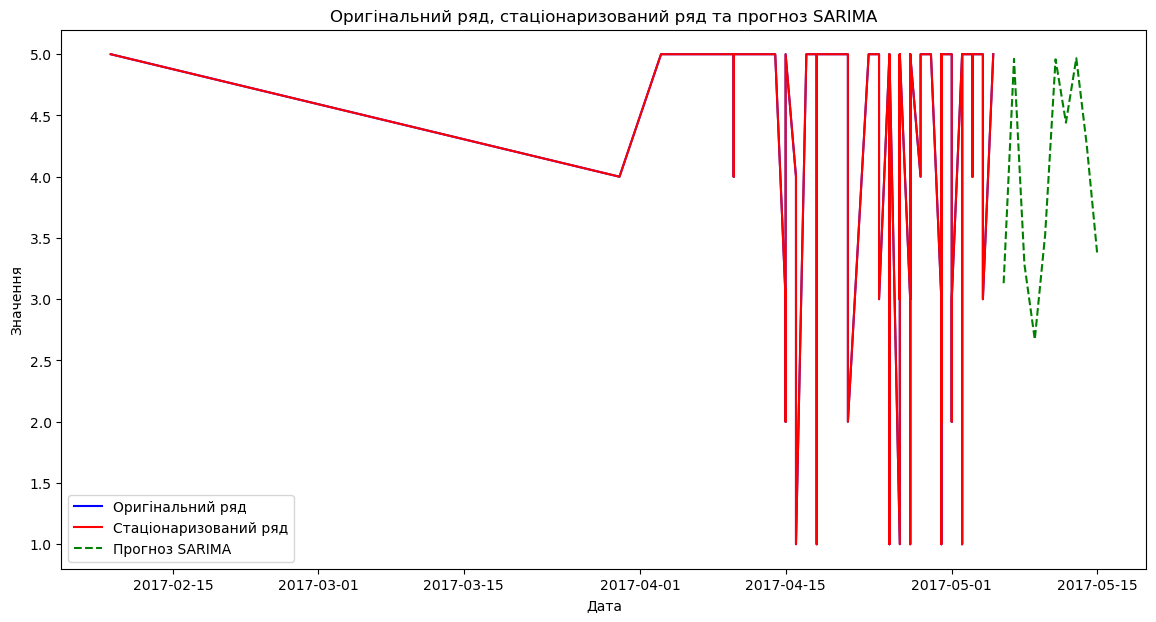

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Визначення параметрів моделі SARIMA
p = 1  # Параметр авторегресії
d = 1  # Ступінь диференціації
q = 1  # Параметр ковзних середніх
s = 12  # Період сезонності

# Створення моделі SARIMA
model = SARIMAX(data_log['stars'], order=(p, d, q), seasonal_order=(p, d, q, s))
result = model.fit()

# Прогноз на n кроків вперед
n_forecast = 10
forecast = result.get_forecast(steps=n_forecast)

# Візуалізація оригінального ряду, стаціонаризованого ряду та прогнозу SARIMA
plt.figure(figsize=(14, 7))
plt.plot(data['stars'], label='Оригінальний ряд', color='blue')
plt.plot(np.exp(data_log['stars']), label='Стаціонаризований ряд', color='red')
plt.plot(pd.date_range(start=data.index[-1], periods=n_forecast+1, freq='D')[1:], np.exp(forecast.predicted_mean), label='Прогноз SARIMA', color='green', linestyle='dashed')
plt.title('Оригінальний ряд, стаціонаризований ряд та прогноз SARIMA')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided,

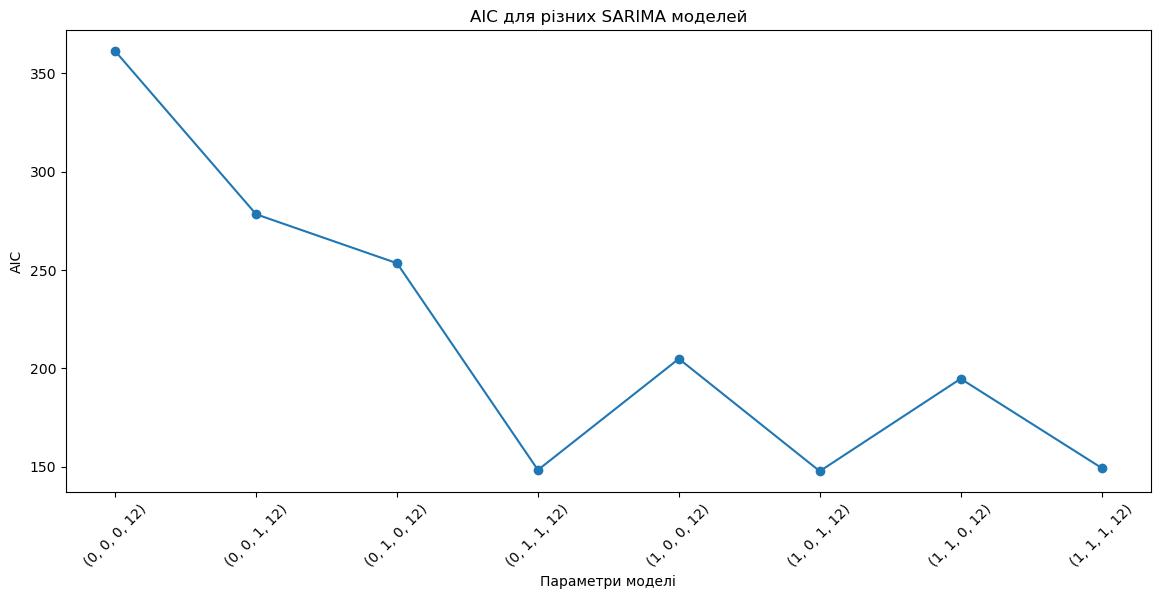

Оптимальні параметри для моделі: (1, 0, 1, 12)


In [55]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Визначення параметрів для підбору
p = d = q = range(0, 2)  # діапазон для AR, I, MA
s = [12]  # період сезонності
params = product(p, d, q, s)
params_list = list(params)

# Підбір оптимальних параметрів за AIC
results = []
best_aic = float("inf")

for param in params_list:
    try:
        model = SARIMAX(data_log['stars'], order=(param[0], param[1], param[2]), seasonal_order=(param[0], param[1], param[2], param[3]))
        result = model.fit()
        aic = result.aic

        # Збереження кращого результату
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, aic])
    except Exception as e:
        continue

# Побудова графіку AIC для всіх моделей
aic_values = [result[1] for result in results]
param_values = [str(result[0]) for result in results]

plt.figure(figsize=(14, 6))
plt.plot(param_values, aic_values, marker='o')
plt.title('AIC для різних SARIMA моделей')
plt.xlabel('Параметри моделі')
plt.ylabel('AIC')
plt.xticks(rotation=45)
plt.show()

# Вивід оптимальних параметрів
print(f'Оптимальні параметри для моделі: {best_param}')

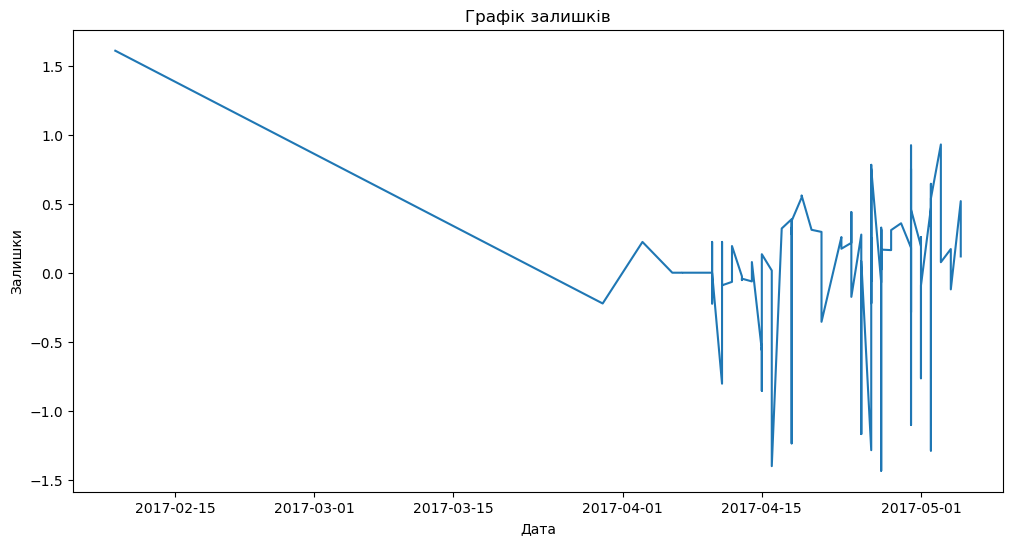

In [56]:
# Отримання залишків
residuals = result.resid

# Візуалізація графіка залишків
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Графік залишків')
plt.xlabel('Дата')
plt.ylabel('Залишки')
plt.show()

In [58]:
from scipy.stats import kstest

# Тест Колмогорова-Смірнова
ks_statistic, ks_p_value = kstest(residuals, 'norm')

# Вивід результатів тесту
print(f'Тест Колмогорова-Смірнова:')
print(f'p-значення: {ks_p_value}')

Тест Колмогорова-Смірнова:
p-значення: 1.536640811862859e-06


D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

D:\Software\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



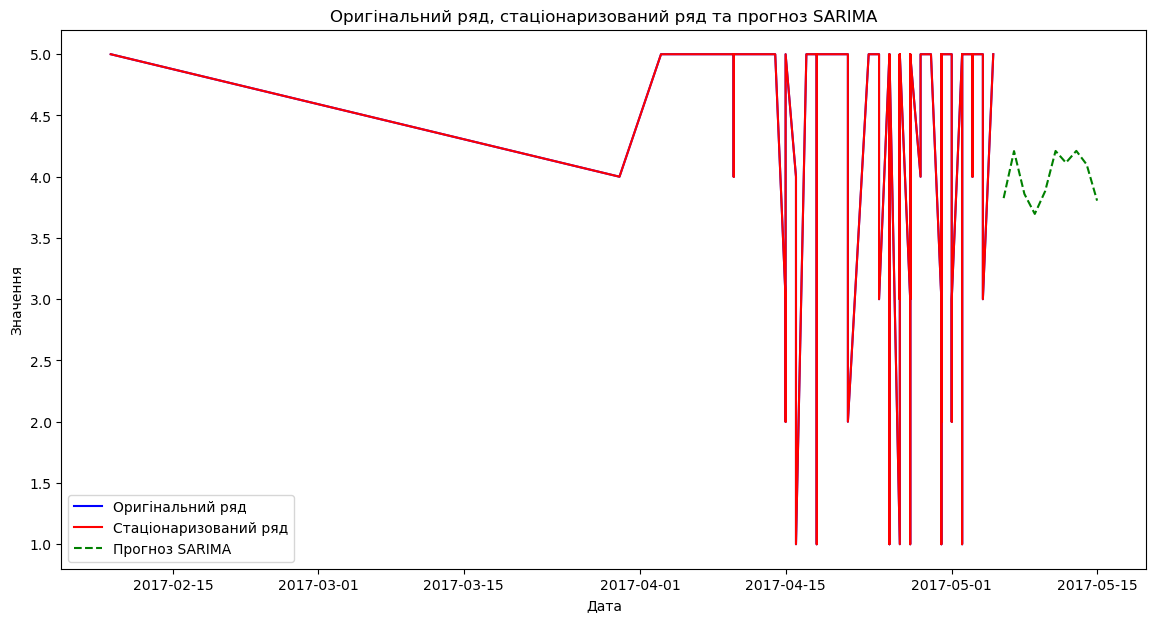

In [59]:
# Прогноз на основі найкращої моделі
p = 1  # Параметр авторегресії
d = 0  # Ступінь диференціації
q = 1  # Параметр ковзних середніх
s = 12  # Період сезонності

# Підгонка моделі SARIMA
model = SARIMAX(data_log['stars'], order=(p, d, q), seasonal_order=(p, d, q, s))
result = model.fit()

# Прогноз на n кроків вперед
n_forecast = 10
forecast = result.get_forecast(steps=n_forecast)

# Візуалізація оригінального ряду, стаціонаризованого ряду та прогнозу SARIMA
plt.figure(figsize=(14, 7))
plt.plot(data['stars'], label='Оригінальний ряд', color='blue')
plt.plot(np.exp(data_log['stars']), label='Стаціонаризований ряд', color='red')
plt.plot(pd.date_range(start=data.index[-1], periods=n_forecast+1, freq='D')[1:], np.exp(forecast.predicted_mean), label='Прогноз SARIMA', color='green', linestyle='dashed')
plt.title('Оригінальний ряд, стаціонаризований ряд та прогноз SARIMA')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()

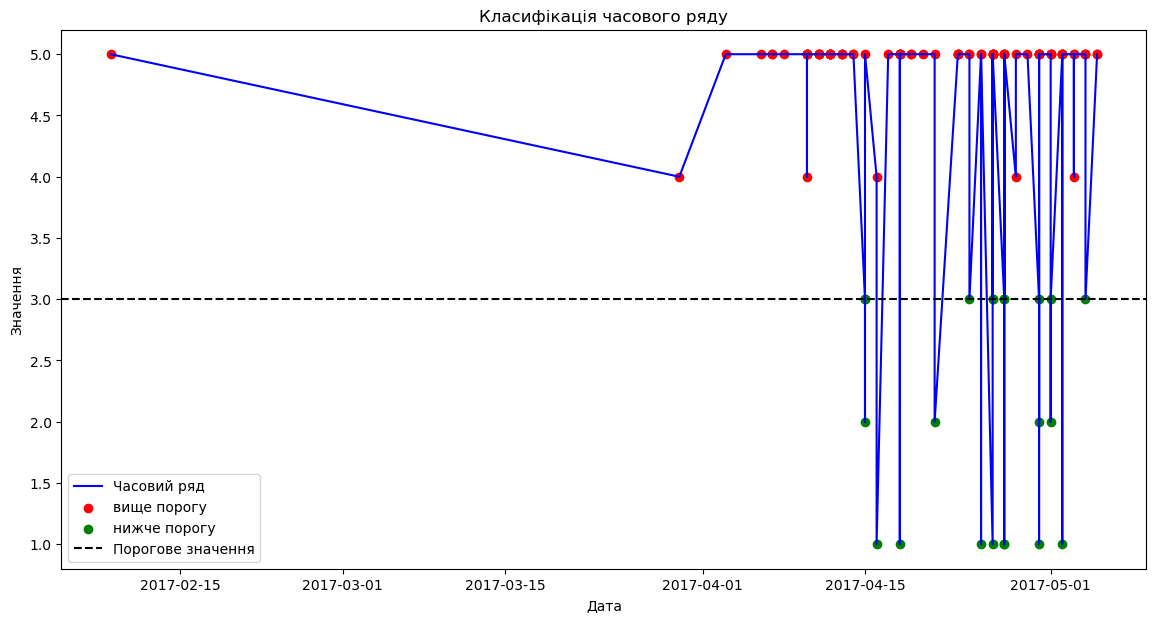

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Визначення порогу для класифікації
threshold = 3

# Класифікація за порогом
data['class'] = np.where(data['stars'] > threshold, 'вище порогу', 'нижче порогу')

# Побудова графіка класифікації
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['stars'], label='Часовий ряд', color='blue')
plt.scatter(data.index[data['class'] == 'вище порогу'], data['stars'][data['class'] == 'вище порогу'], color='red', label='вище порогу')
plt.scatter(data.index[data['class'] == 'нижче порогу'], data['stars'][data['class'] == 'нижче порогу'], color='green', label='нижче порогу')
plt.axhline(y=threshold, color='black', linestyle='--', label='Порогове значення')
plt.title('Класифікація часового ряду')
plt.xlabel('Дата')
plt.ylabel('Значення')
plt.legend()
plt.show()